## Сүүлийн 39 жилийн доллар төгрөгтэй харьцах ханшийн мэдээлэл ашиглан ирээдүйн  доллар төгрөгтэй ханшийг урьдчилан таамаглах нь

### Хэрэгтэй сангууд

In [1]:
%matplotlib inline
import pandas as pd
from fbprophet import Prophet
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize']=(20,10)

ERROR:fbprophet:Importing plotly failed. Interactive plots will not work.


### Dataset  бэлдэх
Монгол Улсын Үндэсний статистикийн хороо 1212.mn-с 1980 оноос өнөөдрийн хүртэлх доллар төгрөгтэй харьцах ханшийн мэдээллийг сарын дундаж утгаар татаж авсан.
Дэлгэрэнгүйг https://www.1212.mn/tables.aspx?tbl_id=DT_NSO_0700_008V1&EROFC_select_all=0&EROFCSingleSelect=_101&YearM_select_all=1&YearMSingleSelect=&YearY_select_all=1&YearYSingleSelect=&viewtype=tableвэб татаж авна уу. 

In [2]:
currency_rate = pd.read_csv('dataset/data.csv')
currency_rate.head(8)

,date,monthly_average
0,1980-01,2.9
1,1980-02,2.9
2,1980-03,2.9
3,1980-04,2.9
4,1980-05,2.9
5,1980-06,2.9
6,1980-07,2.9
7,1980-08,2.9


In [3]:
df = currency_rate.rename(columns={'date': 'ds', 'monthly_average': 'y'})
df.head(10)

,ds,y
0,1980-01,2.9
1,1980-02,2.9
2,1980-03,2.9
3,1980-04,2.9
4,1980-05,2.9
5,1980-06,2.9
6,1980-07,2.9
7,1980-08,2.9
8,1980-09,2.9
9,1980-10,2.9


### Доллар төгрөгтэй харьцах ханшийн мэдээллийн график 1980-2019 он

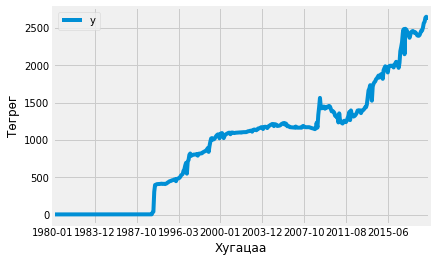

In [4]:
ax = df.set_index('ds').plot()
ax.set_ylabel('currency')
ax.set_xlabel('date')
plt.xlabel('Хугацаа')
plt.ylabel('Төгрөг')
plt.show()

### Prophet & Model
Prophet он цагийн дарааллаар түүхэн  мэдээллийг ашиглан жил бүр, долоо хоног, өдөр тутмын цаг хугацааны дараалсан мэдээллийг урьдчилан таамагладаг фэйсбүүкээс гаргасан нээлттай эхийн сан юм. Documents link https://facebook.github.io/prophet/ 

In [5]:
currency_rate_model = Prophet(
    yearly_seasonality= True, 
    weekly_seasonality=False, 
    daily_seasonality=False
)
# model fit
currency_rate_model.fit(df)

### 1 жилийн дараах ханшийг тооцоё

In [6]:
period = 12 #12 month
future_dates = currency_rate_model.make_future_dataframe(periods=period, freq='M')

In [7]:
forecast = currency_rate_model.predict(future_dates)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(12)

,ds,yhat,yhat_lower,yhat_upper
450,2019-04-30,2694.854773,2619.924651,2773.319035
451,2019-05-31,2694.115760,2617.674836,2768.500700
452,2019-06-30,2714.893166,2633.643795,2789.745083
453,2019-07-31,2725.310821,2647.408664,2802.341444
454,2019-08-31,2760.849958,2676.711548,2835.255072
455,2019-09-30,2807.124335,2729.809019,2884.091123
456,2019-10-31,2826.143413,2755.057073,2905.103023
457,2019-11-30,2836.913743,2758.123164,2915.068884
458,2019-12-31,2779.667553,2700.566459,2851.162364
459,2020-01-31,2831.530346,2757.795536,2904.170336


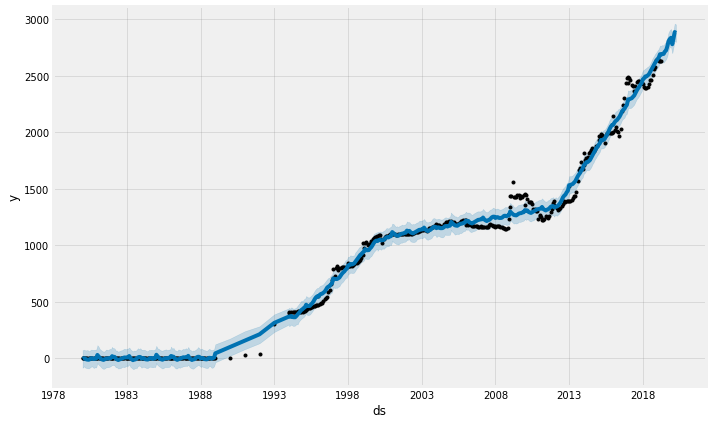

In [8]:
fig = currency_rate_model.plot(forecast, uncertainty=True)

### График анализ

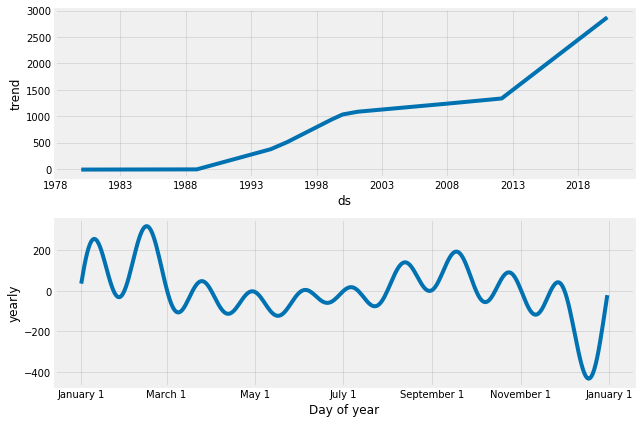

In [9]:
trend = currency_rate_model.plot_components(forecast)

####  Дээрх графикаас үзэхэд жилийн эхээр долларын ханш буурч, жилийн сүүлчээр өсдөг зүй тогтол харагдаж байна

### Таамагласан үр дүн

In [10]:
forecast.set_index('ds', inplace=True)
currency_rate.set_index('date', inplace=True)

Бодит ханшийн мэдээлэл болон таамагласан үр дүнг нэгтгэвэл

In [11]:
visual_df = currency_rate.join(forecast[['yhat', 'yhat_lower','yhat_upper']], how = 'outer')
visual_df.head()

,monthly_average,yhat,yhat_lower,yhat_upper
1980-01-01,2.9,-4.647362,-83.075941,66.687768
1980-01-01,2.9,-4.647362,-83.075941,66.687768
1980-01-01,2.9,-4.647362,-82.322572,71.264644
1980-01-01,2.9,-4.647362,-82.322572,71.264644
1980-02-01,2.9,0.681464,-71.310149,76.323827


In [12]:
vd = visual_df

Бодит болон таамагласан үр дүнгээрээ график зурвал

In [13]:
visual_df = visual_df.rename(columns={'monthly_average': 'actual_rate', 'yhat': 'predicted'})

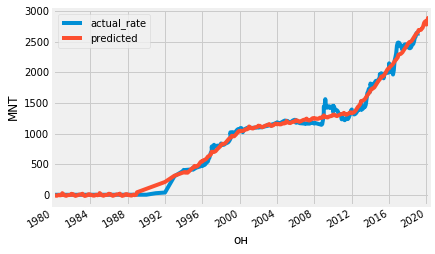

In [14]:
ax = visual_df[['actual_rate', 'predicted']].plot()
ax.set_ylabel('monthly_average')
ax.set_xlabel('date')
plt.xlabel('он')
plt.ylabel('MNT')
plt.show()

### 2019 оны 03 сар хүртэлх ханшийн таамаглал

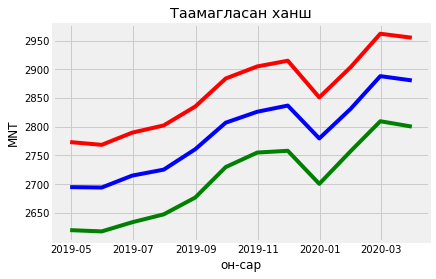

In [15]:
plt.plot(vd['yhat_lower'].tail(period), color='green')
plt.plot(vd['yhat'].tail(period), color='blue')
plt.plot(vd['yhat_upper'].tail(period), color='red')
plt.xlabel('он-сар')
plt.ylabel('MNT')
plt.title('Таамагласан ханш')
plt.show()

### Дүгнэлт

#### Сар бүрийн таамагласан ханш нь дундаж ханш, хамгийн бага ханш, хамгийн их ханш гэсэн гурван ханшийн мэдээлэл гарч байгааг анзаарах хэрэгтэй. Энэхүү таамаглалаас үзэхэд хамгийн бага ханш нь бодит ханштай нэлээд дөхсөн байна. Wallet investor ( https://walletinvestor.com/forex-forecast/usd-mnt-prediction ) таамагласнаар 2020 оны 03 сард нэг доллар 2762.45 төгрөгтэй тэнцэхээр байна гэж таамагласан байхад доорх хүснэгтэд 2020 оны 03 сарын хамгийн бага ханш 2799.42 төгрөгтэй тэнцэнэ гэж таамагласан байна. Үүнээс үзэхэд доллар төгрөгтэй харьцах ханш ямагт өсөж байхаар байна. 

In [16]:
vd = vd.rename(columns={'yhat':'Таамагласан_дундаж_ханш', 'yhat_lower':'Таамагласан_хамгийн_бага_ханш','yhat_upper':'Таамагласан_хамгийн_их_ханш'})
vd.tail(period)

,monthly_average,Таамагласан_дундаж_ханш,Таамагласан_хамгийн_бага_ханш,Таамагласан_хамгийн_их_ханш
2019-04-30,NaN,2694.854773,2619.924651,2773.319035
2019-05-31,NaN,2694.115760,2617.674836,2768.500700
2019-06-30,NaN,2714.893166,2633.643795,2789.745083
2019-07-31,NaN,2725.310821,2647.408664,2802.341444
2019-08-31,NaN,2760.849958,2676.711548,2835.255072
2019-09-30,NaN,2807.124335,2729.809019,2884.091123
2019-10-31,NaN,2826.143413,2755.057073,2905.103023
2019-11-30,NaN,2836.913743,2758.123164,2915.068884
2019-12-31,NaN,2779.667553,2700.566459,2851.162364
2020-01-31,NaN,2831.530346,2757.795536,2904.170336
